# Week 11

## [Lecture 20](https://computing-in-context.afeld.me/lecture_20.html)

In [3]:
import plotly.express as px
px.histogram

<function plotly.express._chart_types.histogram(data_frame=None, x=None, y=None, color=None, pattern_shape=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, pattern_shape_sequence=None, pattern_shape_map=None, marginal=None, opacity=None, orientation=None, barmode='relative', barnorm=None, histnorm=None, log_x=False, log_y=False, range_x=None, range_y=None, histfunc=None, cumulative=None, nbins=None, text_auto=False, title=None, subtitle=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure>

### plotly.express as px例子

In [4]:
fig = px.histogram(
    df,
    x="column_x",
    y="column_y"
    title="title of the graph",
    labels={"column_x": "X Label"}, # 用于给轴或图例重新命名
)

fig.update_layout(yaxis_title_text="Number of community districts")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2277085085.py, line 4)

In [ ]:
fig = px.scatter(
    data_frame,       # 数据源 DataFrame
    x="column_x",     # x 轴列
    y="column_y",     # y 轴列
    color="category", # 可选：按类别着色
    size="value",     # 可选：点的大小
    title="My Scatter Plot",    # 可选：图标题
    labels={
        "trip_distance": "Distance (miles)",
        "fare_amount": "Fare ($)"
    }                           # 轴标签
)

In [ ]:
fig = px.line(
    data_frame,
    x="column_x",
    y="column_y",
    labels={
        "column_x": "X Axis Label",
        "column_y": "Y Axis Label"
    },
    title="Your Title"
)

`trend_results = px.get_trendline_results(fig).iloc[0, 0]`
- 用来从 Plotly 图表中提取并隔离回归分析（趋势线）的结果数据
- `px.get_trendline_results(fig)`从名为 fig 的 Plotly 图表对象中提取所有趋势线的拟合统计结果, 它返回一个 pandas DataFrame。这个 DataFrame 有一列叫 "px_fit_results"，里面包含了统计模型对象 (通常是 statsmodels 的结果)
- iloc[0, 0] 会精确定位并提取第一行第一列的那个底层的统计模型结果对象本身

`fig.update_layout()`

### code笔记

```
columns = [
    "boro_cd",
    "Borough",
    "CD Name",
    "2010 Population",
    "num_311_requests",
    "requests_per_capita",
]
cd_data = districts[columns]

cd_data
```
cd_data = districts[columns] 执行了核心操作。它从一个名为 districts 的原始 DataFrame（一个表格型数据结构）中，只选择了 columns 列表中指定的那些列。

cd_data 是一个新的 DataFrame（数据框），它是原始 districts 数据的一个子集（Subset）。这个新的数据框只包含了指定的六列数据：boro_cd, Borough, CD Name, 2010 Population, num_311_requests, 和 requests_per_capita

## [Lecture 21](https://computing-in-context.afeld.me/lecture_21_exercise_solution.html)

### Wide Format to Long Format, using .melt()

Wide Format (宽格式)
- Structure: Each unique subject or observation is a single row, and different measurements of that subject are spread across multiple columns.
- Best for: Human readability and basic data entry.
- 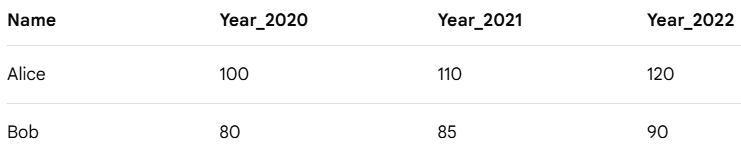

Long Format (长格式)
- Structure: Each row represents a single observation or measurement point. Variables are stacked vertically. 
- Best for: Machine processing, statistical analysis, and plotting libraries (like Plotly or Seaborn).
- 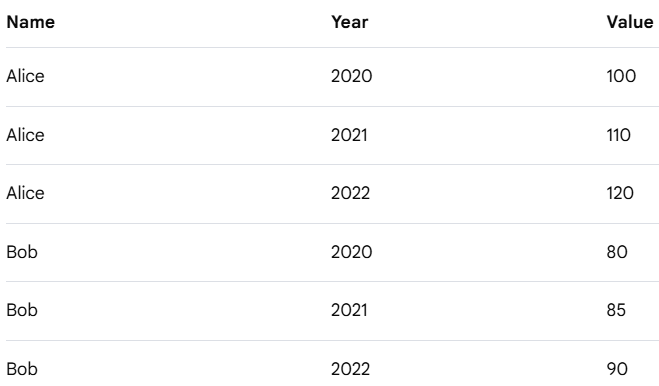

In [ ]:
pd.melt(
    DataFrame,
    id_vars=["（保留不变的列）"],       # 这些列在 melt 后 保持原样，不被展开
    value_vars=["（要被“拉长”的列"],    # 指定哪些列要变成“长格式的行”。如果不写，默认把除了 id_vars 以外的所有列都拉长。
    var_name="（原列名变成的新列名）",   # 指定展开后的“变量名”列叫什么
    value_name="（原单元格值的新列名）", # 展开后每个值存到这列
    col_level=None,
    ignore_index=True,
)

In [ ]:
# turn the population columns into rows
populations = pd.melt(
    pop_by_cd,
    id_vars=["Borough", "CD Number", "CD Name"],
    var_name="year",
    value_name="population",
)

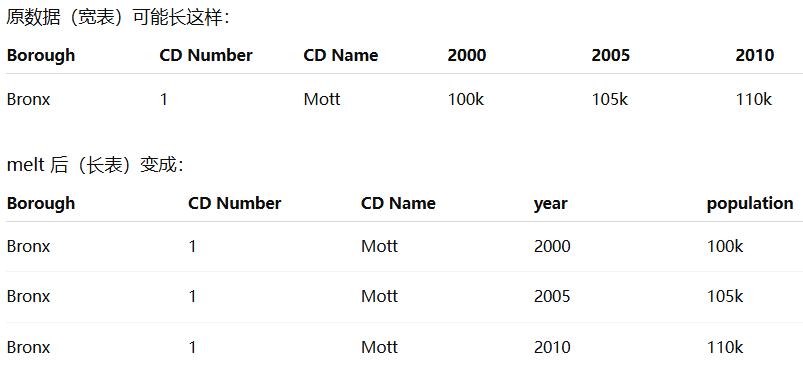

⬆️把宽表按年份“拉长”为长表，每行对应一个国家一年的人口电力可及率，并去掉无效值

### code笔记

`quantile(0.05)` 的意思是 计算数据的第 5 百分位数（5% 分位点）。
- 也就是把数据从小到大排列后，有 5% 的值小于或等于这个数。
- 简单一句话：找到数据中最小的 5% 的界限值。

`bottom_countries_electricity = electricity_by_country_by_year[electricity_by_country_by_year["Country Name"].isin(bottom_countries.index)]`
- 从 electricity_by_country_by_year 里 筛选出国家名在 bottom_countries.index 列表中的行
- isin() 会返回布尔 Series，用于过滤数据
- 一句话总结：选出属于 bottom_countries 的国家对应的所有年份数据。
- `.isin(bottom_countries.index)`检查 "Country Name" 列的值是否在 bottom_countries 的索引里

### Two Y Axes

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. 创建带 secondary y-axis 的图
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 2. 添加 trace（曲线）
fig.add_trace(
    go.Scatter(x=df1["x1"], 
               y=df1["y1"], 
               name="Line 1"
    ),
    secondary_y=False,  # 左 y 轴
)

fig.add_trace(
    go.Scatter(x=df2["x2"], 
               y=df2["y2"], 
               name="Line 2"
    ),
    secondary_y=True,   # 右 y 轴
)

fig.update_layout(title_text="Your Plot Title")     # 3. 设置图标题

fig.update_xaxes(title_text="X Axis Label")     # 4. 设置 x 轴标题

fig.update_yaxes(title_text="Left Y Axis Label", secondary_y=False)     # 5. 设置 y 轴标题
fig.update_yaxes(title_text="Right Y Axis Label", secondary_y=True)

fig.show()

### 地图
[Lecture 21 地图](https://computing-in-context.afeld.me/lecture_21_demo_solution.html)

In [ ]:
def plot_choropleth(df):
    """
    This function makes a choropleth map using a DataFrame
    that contains:
    1. a column used to match geographic regions
    2. a column containing the values to visualize
    """

    fig = px.choropleth_map(
        df,
        locations="COLUMN_MATCHING_GEOJSON",      # column in df used to match each region
        color="COLUMN_FOR_COLOR_VALUES",          # numeric or categorical values to visualize
        geojson=地理边界文件（JSON 格式）,          # 地图的形状
        featureidkey="PATH_TO_ID_IN_GEOJSON",     # GeoJSON 里用于匹配的区域 ID 的路径
        center={"lat": LAT_VALUE, "lon": LON_VALUE},  # center of the map，LAT_VALUE → latitude 纬度；LON_VALUE → longitude 经度
        zoom=ZOOM_LEVEL,#(一般是9)                 # zoom level (optional)
        height=FIGURE_HEIGHT,#(比如600)            # figure size
        title="YOUR_TITLE",                       # map title
    )

    fig.show()

# Week 12
lecture 22：Pivoting例子

[Lecture 23](https://computing-in-context.afeld.me/lecture_23.html)：Time series Resampling

### Pivoting

`df.pivot(index = “”, column = “”, values = “”)`

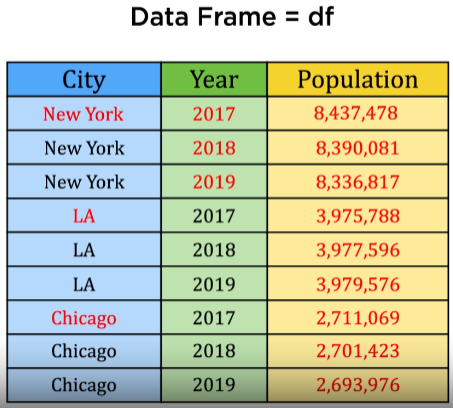 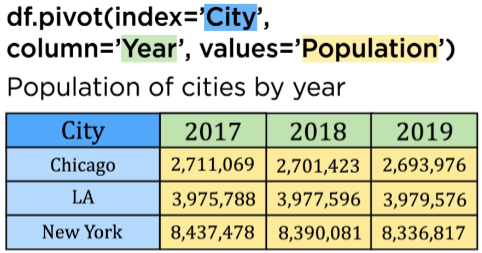

### Time series

#### Convert columns to timestamps using pandas’ to_datetime()

`df["column"] = pd.to_datetime(df["column"], format="时间格式")`

时间格式：

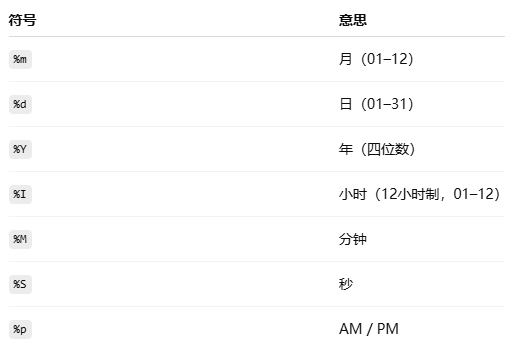

e.g. `format="%m/%d/%Y %I:%M:%S %p"` → "04/12/2021 07:33:00 PM"

####  Resampling

`noise_per_day = noise.resample("D", on="Created Date").size().reset_index(name="count_requests")`
- 根据 “Created Date” 这列，把数据按“天”重新分组（resample），计算每天有多少条记录，并把结果变成一个新的 DataFrame
- `resample("D", on="Created Date")` → 按“天（Day）”对 "Created Date" 这列进行时间分组。（前提：这一列已经是 datetime 类型）
- `.size()` → 统计每一天的记录数量
- `.reset_index(name="count_requests")`→ 把结果变成一个普通 DataFrame，新增一列名为 "count_requests" 表示每天的数量
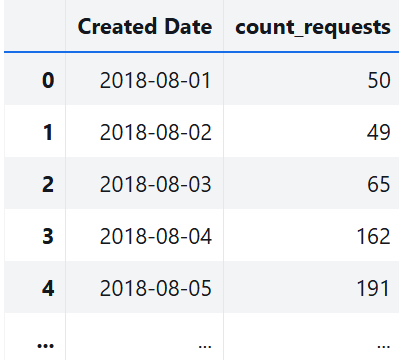

`noise_per_week = noise.resample("W", on="Created Date").size().reset_index(name="count_requests")`

What’s the average duration?

`requests_311["resolution_duration"] = requests_311["Closed Date"] - requests_311["Created Date"]`
`requests_311["resolution_duration"].mean()`
`requests_311["resolution_duration"].median()`

### APIs

APIs

How it happens: If organization makes one available

Pros: Usually allows some filtering; can always pull latest-and-greatest

Cons: Requires network connection for every call; higher barrier to entry (reading documentation, access); subject to availability and performance of API

# ✅ **1. 什么是 API？（必须掌握）**

**API（Application Programming Interface）= 不同系统之间交换数据的接口。**

**API (Application Programming Interface) is a standardized way for different systems to communicate and exchange data.**

API 的作用：

* **传数据**（前端 ↔ 后端）
* **连接系统**（第三方服务）
* **实现功能**（登录、支付、数据查询等）

---

# ✅ **2. API 在整个系统架构中的位置**

用户
→ 使用 **Web前端 / Mobile app / 其他系统**
→ 他们请求都通过 **API**
→ API 调用 **后端逻辑（Python、Django、Rails、.NET …）**
→ 后端最终访问 **数据库（MySQL、Postgres、SQL Server、MongoDB…）**

* Users interact with
  **web apps / mobile apps / other systems**
* These applications send requests to the **API**
* The API triggers **backend logic**
  (Python, Django, Ruby on Rails, .NET, etc.)
* The backend reads/writes data from a **database**
  (MySQL, PostgreSQL, SQL Server, MongoDB, BigQuery…)


📌 **API = 前端与后端之间的必经之路**

这是整个软件系统的“大十字路口”。

---

# ✅ **3. API 的常见类型（必须记）**

| 类型           | 特点                    | 用途         |
| ------------ | --------------------- | ---------- |
| **REST API** | 常见，基于 HTTP，URL + JSON | 大多数 Web 服务 |
| **GraphQL**  | 客户端决定取什么字段            | 前后端分离、移动端  |
| **SOAP**     | XML 格式，旧系统常见          | 银行、政府系统    |


| Type         | Description                                 | Usage                                    |
| ------------ | ------------------------------------------- | ---------------------------------------- |
| **REST API** | Based on HTTP, returns JSON                 | Most modern web services                 |
| **GraphQL**  | Client specifies exactly what data it needs | Mobile apps, modern front-end frameworks |
| **SOAP**     | XML-based, older enterprise systems         | Banks, government systems                |

- REST API例子：天气 app 调用

天气 app 调用：

```
GET https://api.weather.com/city/NewYork
```

返回 JSON：

```json
{"temp": 22, "condition": "Sunny"}
```

- GraphQL例子：

Client asks only for fields it needs:

```
{
  user(id: 5) {
    name
    email
  }
}
```

Returns **only** name + email.

- SOAP例子：

银行用 SOAP XML 做转账：

```xml
<Transfer>
  <Amount>100</Amount>
  <From>123</From>
  <To>456</To>
</Transfer>
```
---

# ✅ **4. API 的输入与输出**

API 本质上：

📌 **输入：请求 → JSON / URL 参数 / Headers**

📌 **输出：响应 → JSON 数据（最常见）**

* **Input:** request parameters, JSON, headers
* **Output:** JSON response (most common)

---

# ✅ **5. API = 系统整合（integration）的核心（图 1 & 2）**

你给的第 1、2 张图，是讲 **系统之间如何交换数据**：

* Cloud Functions / Cloud Run → 接收或转换文件
* Google Drive / Forms → 手动上传文件
* Snowflake → 数据仓库
* CommCare / 外部 EHR → 医疗数据对接
* OneSchema / JSON / CSV / PDF → 转换为标准格式再进入云存储 → Snowflake

* Cloud services to pass data (Google Cloud, Snowflake)
* External systems to send or receive data
  (e.g., CommCare, healthcare EHRs)
* Automated workflows (Cloud Functions, Cloud Run)
* Handling multiple data formats: JSON, CSV, PDF

关键点：

📌 **API 是让多个系统互联的标准机制**
→ 比如医院系统、Google Cloud、Snowflake 都靠 API 拉/推数据。

📌 **API 可以自动化数据流**（替代人工上传）

📌 **API 负责把不同格式（JSON/CSV/PDF）转成统一标准**

📌 **APIs serve as the standard mechanism for interconnecting multiple systems**
→ For instance, hospital systems, Google Cloud, and Snowflake all rely on APIs to pull/push data.

📌 **APIs enable automated data flow** (replacing manual uploads)

📌 **APIs handle converting different formats (JSON/CSV/PDF) into a unified standard**

---

# ✅ **6. API 的工作流程（你必须会讲）**

以典型 Web 流程为例：

1. 用户在前端点一个按钮
2. 前端用 JS 发一个 API 请求（GET/POST）
3. API 接收到请求后调用后端
4. 后端访问数据库、做逻辑
5. 回传 JSON 给前端
6. 前端显示结果

一句话总结：

📌 **API = 帮用户把复杂的后端操作隐藏起来，只提供一个统一入口。**

Typical request flow:

1. User triggers an action in the UI
2. Front end sends a request to the API
3. API forwards the request to backend logic
4. Backend queries the database
5. Result is returned as JSON
6. Front end displays the information

📌 **APIs hide backend complexity and give clients a simple, unified interface.**

---

# ✅ **7. API 的安全性（图 2）**

图中有一个🔒盾牌，代表：

* 认证（Authentication）
* 授权（Authorization）
* Token / OAuth
* 限流、权限管理

关键知识点：

📌 **任何公开 API 都要验证用户身份，否则会被滥用或攻击。**

APIs require:

* Authentication (verifying the user)
* Authorization (verifying permissions)
* API keys / tokens / OAuth
* Access limits and role controls

📌 **Every API must enforce security to prevent unauthorized data access.**

---

# ✅ **8. API 与敏捷开发（图 3）**

Waterfall vs Agile：

* **瀑布式** → 一次性定义全部需求 → 开发 → 发布
* API适合的不是瀑布式而是**敏捷** → 小步骤循环（Define → Build → Release）
* API 常用于模块化，因此非常适合敏捷开发。

API 帮助：

📌 **让组件独立开发、独立测试、独立发布**（低风险）。

* **Waterfall:** long cycle, high risk at the end
* **Agile:** short, iterative cycles (Define → Build → Release)

APIs help Agile because:

* Components can be built and released independently
* Teams can work on different services without blocking each other
* Functionality can be added gradually

📌 **APIs support modular development, which reduces risk and speeds up delivery.**

---

# 🔥 综合总结（写进你的笔记最重要的部分）

### **API 的作用（最核心）：**

1. **前端与后端之间的通信桥梁**
2. **不同系统之间的数据交换标准**
3. **隐藏复杂逻辑，提供统一接口**
4. **支持自动化数据流与云架构**
5. **增强可扩展性、模块化、敏捷开发**

* Enable communication between front end, backend, and databases
* Allow integration with external systems
* Typically return JSON
* Core to automation, cloud workflows, and system interoperability
* Require authentication and access control
* Fit naturally into agile development cycles


Things are going to differ by API:

- Endpoints（端点） – 不同 API 提供的功能 URL 各不相同。

- Supported parameters（支持的参数） – 每个 API 可接收的查询参数不一样。

- Response structure（返回结构） – 返回的 JSON 格式因 API 而异。

    - json_normalize() 有帮助 – 可以把嵌套 JSON 展开成表格。

- Quality of documentation（文档质量） – 有些 API 文档清晰，有些很差。

- Helpfulness of errors（报错信息质量） – 错误提示可能很详细也可能很模糊。

- Size/helpfulness of community（社区规模） – 流行 API 有更多教程与解决方案。

# JSON

🎯 **一、JSON 还需要掌握的知识点（最重要的）**

## **1. JSON 的基本结构**

JSON = 由以下组成：

* **对象（Object）** → `{ }`
* **数组（Array）** → `[ ]`
* **键值对（key–value pairs）`
* 值可以是：字符串string、数字number、布尔bool、null、对象object、数组

---

## **2. JSON ↔ Python 对象的对应关系**

| JSON        | Python       |
| ----------- | ------------ |
| object `{}` | dict         |
| array `[]`  | list         |
| string      | str          |
| number      | int / float  |
| true/false  | True / False |
| null        | None         |

必须记，因为 API 返回 JSON，你处理的是 Python dict/list。

---

## **3. JSON 常用于 API、数据存储、本地配置文件**

例如：

* API 返回 JSON
* 保存模型配置文件
* 配置前端参数
* 存储小规模数据

---

## **4. JSON 文件扩展名： `.json`**

---

## **5. JSON 不能包含：注释、单引号、Python 特有语法**

---

# 🎯 **二、Python 如何从 JSON 中获取数据？（最常用）**

假设你有一个 JSON：

```python
data = {
    "name": "Anna",
    "age": 20,
    "scores": [90, 85, 88],
    "address": {"city": "New York", "zip": "10001"}
}
```

## **例 1：访问基本字段**

```python
data["name"]       # "Anna"
data["age"]        # 20
```

## **例 2：访问数组里的内容**

```python
data["scores"][0]  # 90
```

## **例 3：访问嵌套 JSON**

```python
data["address"]["city"]   # "New York"
```

---

# 🎯 **三、Python 如何从 API 获取 JSON？（你一定会用到）**

```python
import requests

response = requests.get("https://api.example.com/data")
json_data = response.json()

print(json_data)
```

---

# 🎯 **四、Python 如何生成 JSON 并保存？**

使用 `json` 模块。

## **例 1：Python dict → JSON 字符串**

```python
import json

person = {"name": "Anna", "age": 20}
json_str = json.dumps(person)

print(json_str)
```

输出：

```
{"name": "Anna", "age": 20}
```

---

## **例 2：保存到 .json 文件**

```python
import json

data = {"name": "Anna", "scores": [90, 85, 88]}

with open("data.json", "w") as f:
    json.dump(data, f, indent=2)
```

生成文件：

```json
{
  "name": "Anna",
  "scores": [90, 85, 88]
}
```

---

# 🎯 **五、Python 如何读取 JSON 文件？**

```python
import json

with open("data.json") as f:
    data = json.load(f)

print(data)
```

---

# 🎯 **七、常见 API JSON 处理流程（考试重点）**

1. `requests.get()` 获取数据
2. `.json()` 转为 Python dict/list
3. 取需要的字段
4. 转成 DataFrame
5. 如有嵌套，用 `json_normalize()`
6. 清洗分析
7. 保存结果

---

# 🎯 **八、给你一个非常小的完整示例（最常用模式）**

```python
import requests
import json

# 1. 获取 JSON
response = requests.get("https://jsonplaceholder.typicode.com/users")
data = response.json()

# 2. 提取字段
names = [user["name"] for user in data]

# 3. 打印
print(names)

# 4. 保存结果
with open("users.json", "w") as f:
    json.dump(data, f, indent=2)
```

请解释JSON是什么？

- JSON (JavaScript Object Notation) is a lightweight data format used to store and exchange data.
- It uses key–value pairs and lists, and is the most common format returned by APIs.

- **JSON（JavaScript 对象表示法）**是一种轻量的数据格式，用来存储和交换数据。
- 它由“键–值”对和列表组成，是 API 最常用的返回格式。

请解释GeoJSON是什么？

- GeoJSON is a special type of JSON designed to store geographic data such as points, lines, and polygons (e.g., city boundaries).
- It is commonly used in mapping APIs and visualization tools.

JSON 和 API 的关系
- APIs often return data in JSON, because it is easy for machines and humans to read.

In [ ]:
import requests
response = requests.get("https://data.cityofnewyork.us/resource/xywu-7bv9.json")
data = response.json()
data

- `requests.get(...)` sends a GET request to an API URL.//`requests.get(...)` 向 API URL 发送 GET 请求。

- The API returns JSON data.//API 返回 JSON 数据

- `response.json()` converts the JSON response into a Python object (usually a list of dictionaries).//`response.json()` 把返回的 JSON 转成 Python 对象（通常是字典列表）

- `data` stores the JSON data.//`data` 保存这个数据

- response.json() 会把 API 返回的 JSON 数据转成 Python 的嵌套数据结构。
    - JSON 里的 object 变成 Python dict
    - JSON 里的 array 变成 Python list
    - dict 里可以包含 list，list 里可以包含 dict——因此是 嵌套结构。

json_normalize() 是干嘛的？
- json_normalize() (from pandas) flattens nested JSON and converts it into a table (DataFrame).
It is useful when JSON contains nested objects or lists.

- json_normalize()（来自 pandas）用于 展开嵌套 JSON，把复杂的 JSON 转成表格（DataFrame）。
当 JSON 里有嵌套结构时特别好用。